## Explorary Data Analysis

In [1]:
## 1. Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import ListedColormap

In [106]:
## 2. load the churn dataset 
df = pd.read_csv('train.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [5]:
df.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [45]:
## 3. Target analysis
df.Exited.value_counts(normalize=True)

Exited
0    0.788401
1    0.211599
Name: proportion, dtype: float64

In [35]:
labels = list(df.groupby('Exited')['id'].count().index)
values = list(df.groupby('Exited')['id'].count().values)


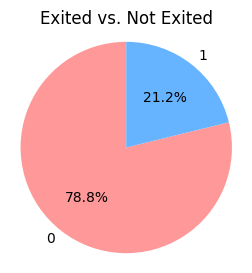

In [44]:
colors = ['#ff9999','#66b3ff']  # Colors for the slices

# Create a pie chart
plt.figure(figsize=(3, 3))
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Add a title
plt.title('Exited vs. Not Exited')

# Display the chart
plt.show()

**Insight 1** : As we see from this pie chart we are dealing with an imbalance dataset

In [51]:
## 4. Analyse Categorical columns
obj_col=df.select_dtypes('O').columns
obj_col

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [54]:
## Our analysis will considere only Geography and Gender since Surname cannot aford as any insights
obj_col = obj_col.drop('Surname')

In [55]:
obj_col

Index(['Geography', 'Gender'], dtype='object')

Column: Geography
Geography
France     0.570882
Spain      0.219428
Germany    0.209690
Name: proportion, dtype: float64


C:\Users\u481468\AppData\Local\Temp\ipykernel_8196\3207525857.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts(normalize=True).index, y=df[col].value_counts(normalize=True), palette=colors, legend=False)


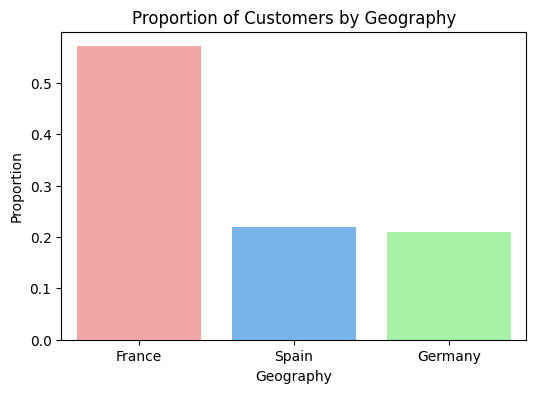

C:\Users\u481468\AppData\Local\Temp\ipykernel_8196\3207525857.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts(normalize=True).index, y=df[col].value_counts(normalize=True), palette=colors, legend=False)
C:\Users\u481468\AppData\Local\Temp\ipykernel_8196\3207525857.py:11: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.barplot(x=df[col].value_counts(normalize=True).index, y=df[col].value_counts(normalize=True), palette=colors, legend=False)


Column: Gender
Gender
Male      0.564429
Female    0.435571
Name: proportion, dtype: float64


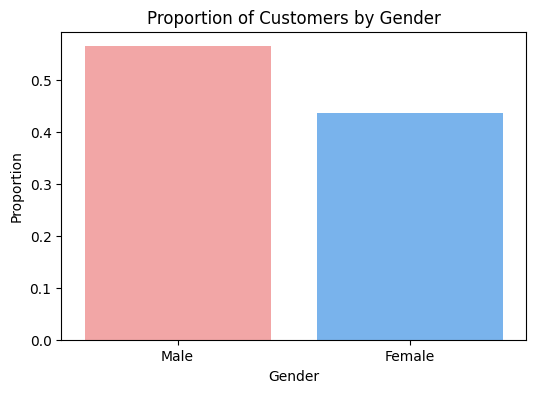

In [81]:
colors = ['#ff9999', '#66b3ff', '#99ff99']
for col in obj_col:
    print("Column:", col)
    print(df[col].value_counts(normalize=True))
    print("=" * 20)

    plt.figure(figsize=(6, 4))
    plt.title(f'Proportion of Customers by {col}')
    
    # Plotting
    sns.barplot(x=df[col].value_counts(normalize=True).index, y=df[col].value_counts(normalize=True), palette=colors, legend=False)

    
    plt.xlabel(col)
    plt.ylabel('Proportion')
   
    plt.show()

**Insight2** : More than 50% of our clients are from france, and the distribution for Genders is somewhat imbalanced, with a higher proportion of males 

Column: Geography


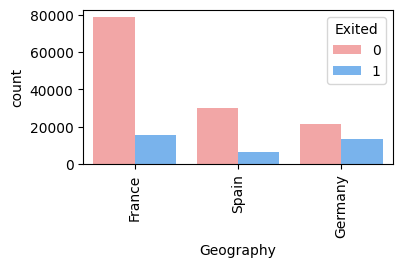

The percentage of churn for Column : Geography
Exited             0          1
Geography                      
France     83.471846  16.528154
Germany    62.104837  37.895163
Spain      82.782426  17.217574
Column: Gender


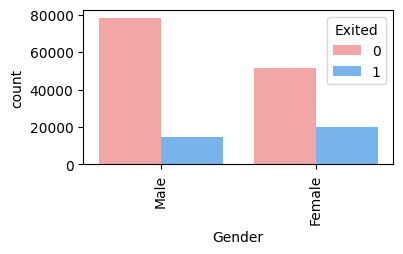

The percentage of churn for Column : Gender
Exited          0          1
Gender                      
Female  72.031328  27.968672
Male    84.094471  15.905529


In [109]:
colors = ['#ff9999', '#66b3ff']
## 5. check the correlation between categorical columns and the churn
for col in obj_col:
    print("Column:", col)

    plt.figure(figsize=(4,2))
    sns.countplot(x =col, data = df, hue= df['Exited'], palette= colors)
    plt.xticks(rotation=90)
    plt.show()

    print(f'The percentage of churn for Column : {col}')
    df_grouped = df.groupby(by=[col,'Exited'])['Age'].count().reset_index().rename({'Age': 'Count'}, axis=1)

    # Create a pivot table to get counts of 0s and 1s for "Exited" grouped by "Geography"
    pivot_table = df_grouped.pivot_table(index=df_grouped.columns[0], columns='Exited', values='Count', aggfunc='sum', fill_value=0)

    # Calculate percentage
    total_count = pivot_table.sum(axis=1)
    percentage_df = pivot_table.div(total_count, axis=0) * 100

    print(percentage_df)


**Insights3**: Female Churn more than Male, and the percentage of churn in Germany is multiplied x2 than the other countries